<a href="https://colab.research.google.com/github/edgarbernaling-arch/Desafio_1_Ciencia_de_datos_Edgar_Bernal/blob/main/Copia_de_AluraStoreLatam_Challegue1_Ciencia_de_datos_Edgar_Bernal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [132]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [133]:
#  Calcular el ingreso total para cada tienda (suma de la columna 'Precio')
ingreso_total_tienda1 = tienda['Precio'].sum()
ingreso_total_tienda2 = tienda2['Precio'].sum()
ingreso_total_tienda3 = tienda3['Precio'].sum()
ingreso_total_tienda4 = tienda4['Precio'].sum()

#  Mostrar los resultados
print(f"Ingreso Total Tienda 1: {ingreso_total_tienda1:,.1f}")
print(f"Ingreso Total Tienda 2: {ingreso_total_tienda2:,.1f}")
print(f"Ingreso Total Tienda 3: {ingreso_total_tienda3:,.1f}")
print(f"Ingreso Total Tienda 4: {ingreso_total_tienda4:,.1f}")

Ingreso Total Tienda 1: 1,150,880,400.0
Ingreso Total Tienda 2: 1,116,343,500.0
Ingreso Total Tienda 3: 1,098,019,600.0
Ingreso Total Tienda 4: 1,038,375,700.0


#### (Tienda 1) la que mas vendio

### GRÁFICO:

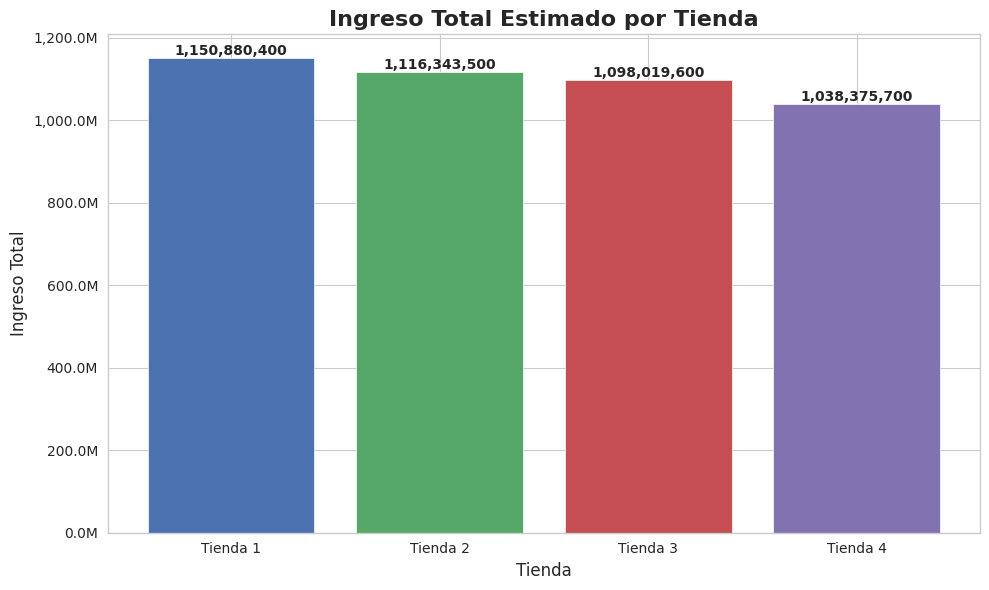

In [134]:
from matplotlib.ticker import FuncFormatter

#  Datos de ingresos totales (suma de la columna 'Precio')
data = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Total': [1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]
}
df_ingresos = pd.DataFrame(data)

#  Configuración del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

#  Crear el gráfico de barras
bars = plt.bar(df_ingresos['Tienda'], df_ingresos['Ingreso Total'], color=['#4C72B0', '#55A868', '#C44E52', '#8172B2'])

#  Etiquetas y título
plt.title('Ingreso Total Estimado por Tienda', fontsize=16, weight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingreso Total', fontsize=12)

#  Función para formatear el eje Y en millones (M)
def millions_formatter(x, pos):
    return f'{x/1e6:,.1f}M'
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

#  Agregar el valor exacto sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500000,
             f'{yval:,.0f}',
             ha='center', va='bottom', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [135]:
# Iterar sobre cada DataFrame para calcular y mostrar el conteo de ventas
for nombre_tienda, df in dataframes.items():

    df_conteo = df.groupby('Categoría del Producto')['Producto'].count().reset_index(name="Ventas")

    # ORDENAR de mayor a menor (ascending=False)
    df_conteo = df_conteo.sort_values(by='Ventas', ascending=False)

    # Imprimir la tabla
    print(f"## 🛍️ {nombre_tienda}")
    print(df_conteo.to_markdown(index=False))
    print("-------------------------------------------------------------------")

## 🛍️ Tienda 1
| Categoría del Producto   |   Ventas |
|:-------------------------|---------:|
| Muebles                  |      465 |
| Electrónicos             |      448 |
| Juguetes                 |      324 |
| Electrodomésticos        |      312 |
| Deportes y diversión     |      284 |
| Instrumentos musicales   |      182 |
| Libros                   |      173 |
| Artículos para el hogar  |      171 |
-------------------------------------------------------------------
## 🛍️ Tienda 2
| Categoría del Producto   |   Ventas |
|:-------------------------|---------:|
| Muebles                  |      442 |
| Electrónicos             |      422 |
| Juguetes                 |      313 |
| Electrodomésticos        |      305 |
| Deportes y diversión     |      275 |
| Instrumentos musicales   |      224 |
| Libros                   |      197 |
| Artículos para el hogar  |      181 |
-------------------------------------------------------------------
## 🛍️ Tienda 3
| Categoría del Pro

#### Muebles el producto que más se vendio

### GRÁFICO:

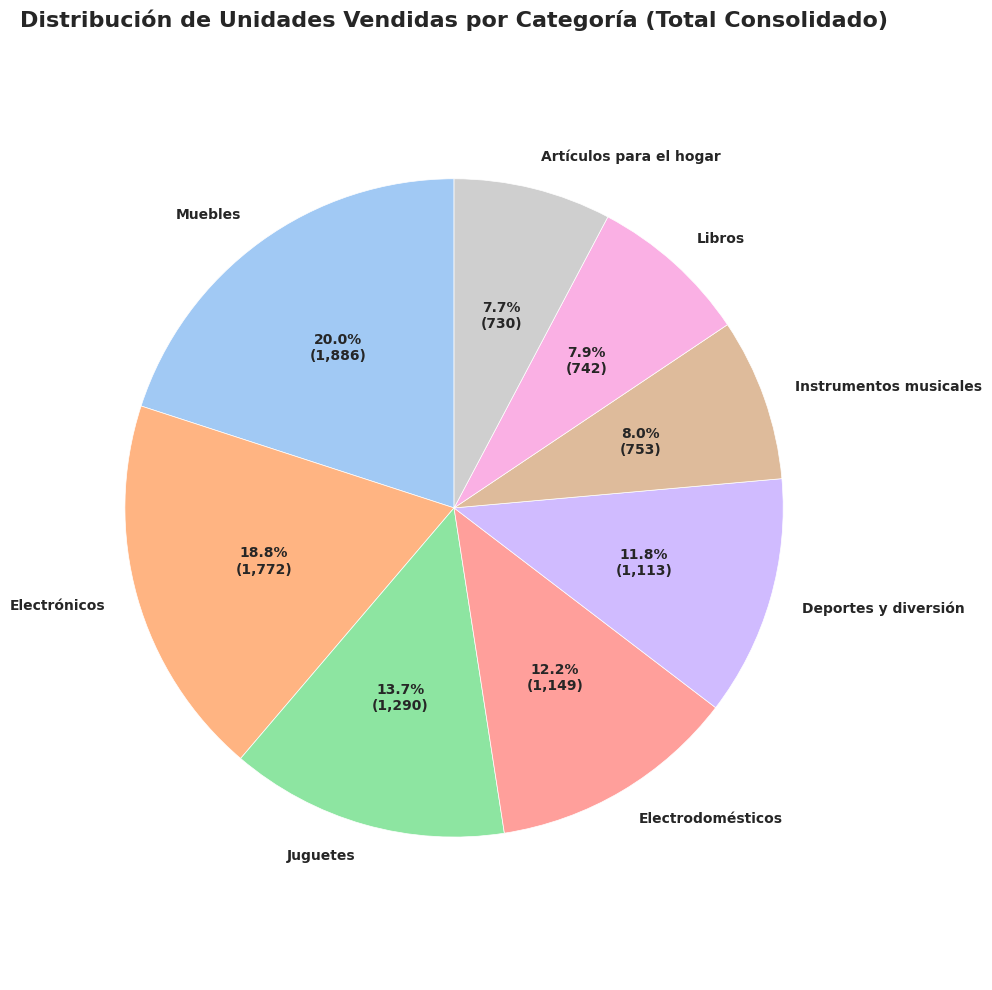

In [136]:
#  Consolidar todas las tiendas
todas_las_tiendas = [tienda, tienda2, tienda3, tienda4]
df_consolidado = pd.concat(todas_las_tiendas, ignore_index=True)

# Agrupar por 'Categoría del Producto' y contar la columna 'Producto'
# Esto define la variable df_conteo_total que faltaba
df_conteo_total = df_consolidado.groupby('Categoría del Producto')['Producto'].count().reset_index(name="Ventas")
df_conteo_total = df_conteo_total.sort_values(by='Ventas', ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))

# Preparar los datos para el gráfico de torta
conteo = df_conteo_total['Ventas']
etiquetas = df_conteo_total['Categoría del Producto']

# Crear el gráfico de torta
plt.pie(
    conteo,
    labels=etiquetas,
    # Muestra el porcentaje (%.1f) y el conteo de unidades (unidades vendidas)
    autopct=lambda p: f'{p:.1f}%\n({round(p * sum(conteo) / 100):,})',
    startangle=90,
    colors=sns.color_palette("pastel"),
    textprops={'fontsize': 10, 'weight': 'bold'}
)

# Título
plt.title('Distribución de Unidades Vendidas por Categoría (Total Consolidado)', fontsize=16, fontweight='bold')
plt.axis('equal')

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [137]:
#  Calcular el promedio para cada tienda individualmente
calif_promedio_tienda1 = tienda['Calificación'].mean()
calif_promedio_tienda2 = tienda2['Calificación'].mean()
calif_promedio_tienda3 = tienda3['Calificación'].mean()
calif_promedio_tienda4 = tienda4['Calificación'].mean()

#  Crear un DataFrame de resultados
df_calificaciones = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificación Promedio': [
        calif_promedio_tienda1,
        calif_promedio_tienda2,
        calif_promedio_tienda3,
        calif_promedio_tienda4
    ]
})

# Ordenar y formatear los resultados
df_calificaciones = df_calificaciones.sort_values(by='Calificación Promedio', ascending=False)
df_calificaciones['Calificación Promedio'] = df_calificaciones['Calificación Promedio'].map('{:.2f}'.format)

# --- RESULTADOS ---

print("--- EJERCICIO 3: CALIFICACIÓN PROMEDIO DE LAS TIENDAS ---")
print(df_calificaciones.to_markdown(index=False))
print("---------------------------------------------------------")

--- EJERCICIO 3: CALIFICACIÓN PROMEDIO DE LAS TIENDAS ---
| Tienda   |   Calificación Promedio |
|:---------|------------------------:|
| Tienda 3 |                    4.05 |
| Tienda 2 |                    4.04 |
| Tienda 4 |                    4    |
| Tienda 1 |                    3.98 |
---------------------------------------------------------


#### (Tienda 3) calificación más alta

### GRÁFICO:

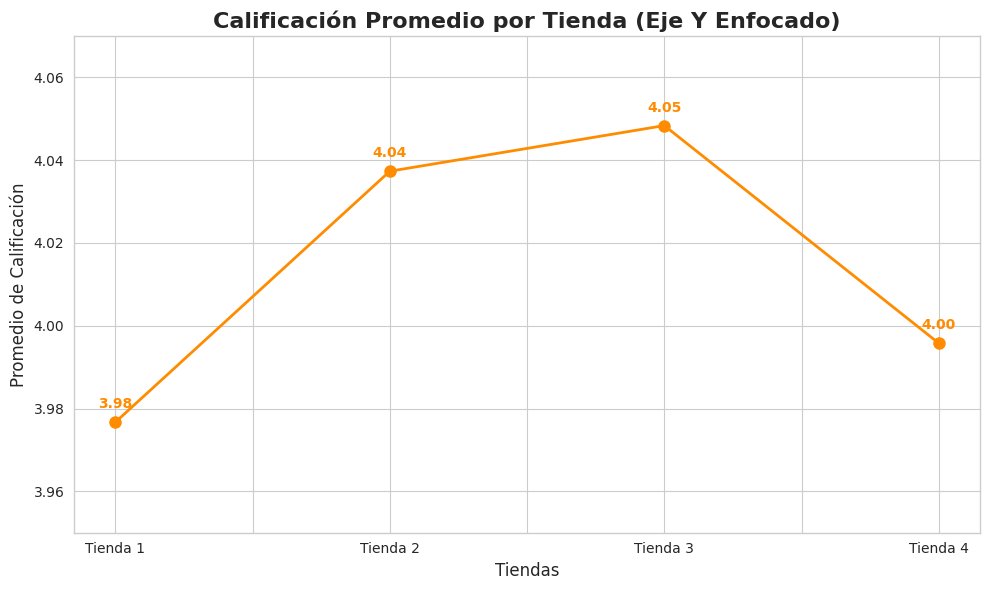

In [138]:
# Calcula la media de la columna 'Calificación' en cada DataFrame
promedio1 = tienda['Calificación'].mean()
promedio2 = tienda2['Calificación'].mean()
promedio3 = tienda3['Calificación'].mean()
promedio4 = tienda4['Calificación'].mean()

# --- PREPARACIÓN DE DATOS ---

promedio = [promedio1, promedio2, promedio3, promedio4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
data = {'Tienda': tiendas, 'Promedio': promedio}
df = pd.DataFrame(data)

# --- GENERACIÓN DEL GRÁFICO ---

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Crear el gráfico de línea
ax = df.plot(
    kind='line',
    x='Tienda',
    y='Promedio',
    marker='o',
    color='darkorange',
    linewidth=2,
    markersize=8,
    ax=plt.gca()
)

# Añadir etiquetas de valor en cada punto
for i, txt in enumerate(df['Promedio']):
    ax.annotate(
        f'{txt:.2f}',
        (i, txt),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        fontweight='bold',
        color='darkorange'
    )

# ESTABLECER EL LÍMITE DEL EJE Y
# NOTA: Los promedios reales están entre 3.98 y 4.05, por lo que usaremos ese rango
# para enfocarnos en las diferencias.
plt.ylim(3.95, 4.07)

# Configuración adicional
plt.title('Calificación Promedio por Tienda (Eje Y Enfocado)', fontsize=16, fontweight='bold')
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Promedio de Calificación', fontsize=12)
plt.legend().remove()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [139]:
dataframes = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

print("--- EJERCICIO 4: PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA ---")
print("\n" + "="*80)

for nombre_tienda, df in dataframes.items():
    # 1. Agrupar por 'Producto' y contar el número de transacciones (ventas)
    df_ventas_producto = df.groupby('Producto').size().reset_index(name='Total Unidades Vendidas')

    # 2. Ordenar de mayor a menor (Más vendidos)
    df_mas_vendidos = df_ventas_producto.sort_values(by='Total Unidades Vendidas', ascending=False)

    # 3. Ordenar de menor a mayor (Menos vendidos)
    df_menos_vendidos = df_ventas_producto.sort_values(by='Total Unidades Vendidas', ascending=True)

    print(f"## 🏢 {nombre_tienda}")

    # Mostrar Top 3
    print("### 🥇 Top 3 Productos Más Vendidos")
    print(df_mas_vendidos.head(3).to_markdown(index=False))

    # Mostrar Bottom 3
    print("\n### 📉 Top 3 Productos Menos Vendidos")
    print(df_menos_vendidos.head(3).to_markdown(index=False))

    print("\n" + "="*80)

--- EJERCICIO 4: PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA ---

## 🏢 Tienda 1
### 🥇 Top 3 Productos Más Vendidos
| Producto      |   Total Unidades Vendidas |
|:--------------|--------------------------:|
| Armario       |                        60 |
| TV LED UHD 4K |                        60 |
| Microondas    |                        60 |

### 📉 Top 3 Productos Menos Vendidos
| Producto                  |   Total Unidades Vendidas |
|:--------------------------|--------------------------:|
| Auriculares con micrófono |                        33 |
| Celular ABXY              |                        33 |
| Olla de presión           |                        35 |

## 🏢 Tienda 2
### 🥇 Top 3 Productos Más Vendidos
| Producto                  |   Total Unidades Vendidas |
|:--------------------------|--------------------------:|
| Iniciando en programación |                        65 |
| Microondas                |                        62 |
| Batería                   |                  

#### Los productos que más y menos se vendieron corresponden a la tienda 2 que corresponden a iniciando en programación y juego de mesa.

### GRÁFICO:

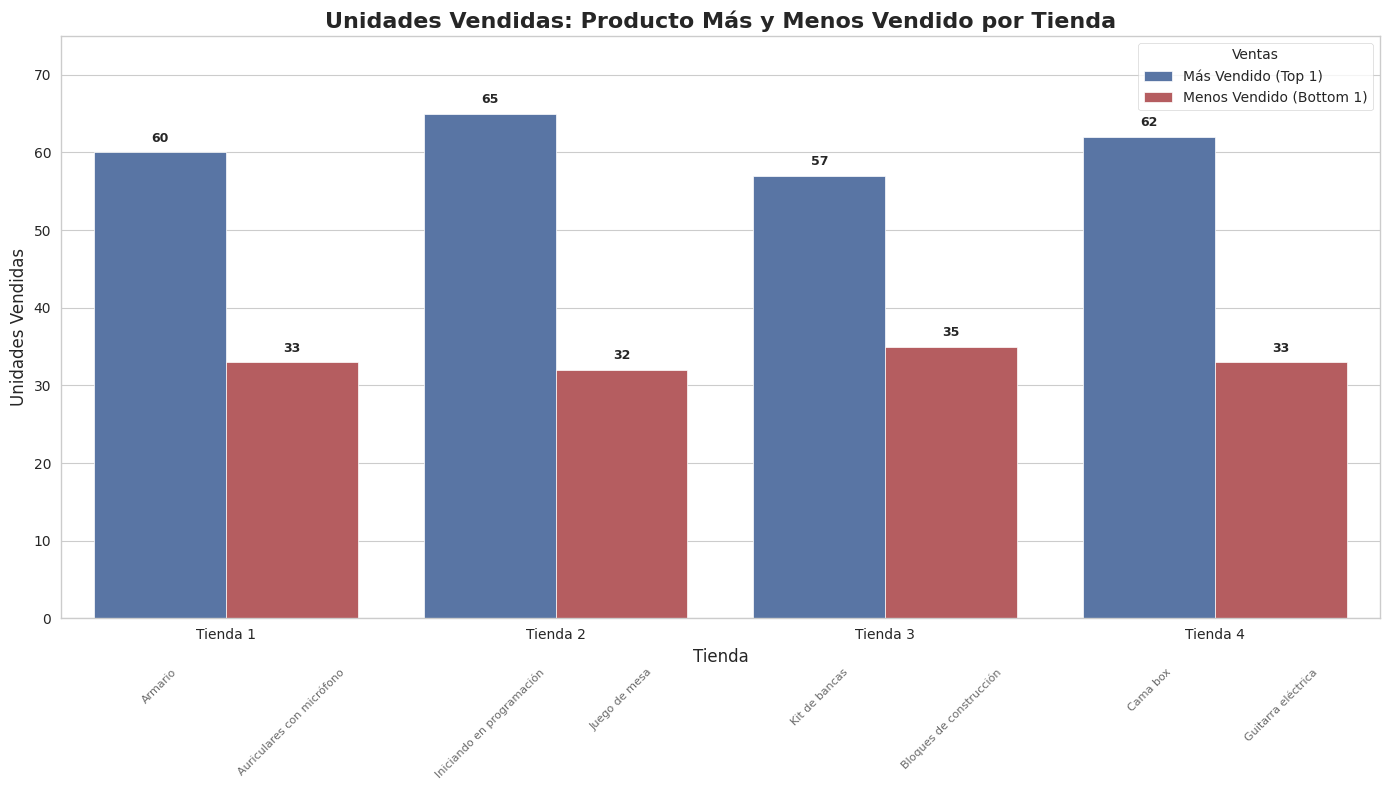

In [140]:
datos_comparativos = []

for nombre_tienda, df in dataframes.items():
    df_ventas = df.groupby('Producto').size().reset_index(name='Ventas')
    df_top1 = df_ventas.sort_values(by='Ventas', ascending=False).iloc[0]
    df_bottom1 = df_ventas.sort_values(by='Ventas', ascending=True).iloc[0]

    datos_comparativos.append({
        'Tienda': nombre_tienda,
        'Tipo': 'Más Vendido (Top 1)',
        'Producto': df_top1['Producto'],
        'Unidades': df_top1['Ventas']
    })
    datos_comparativos.append({
        'Tienda': nombre_tienda,
        'Tipo': 'Menos Vendido (Bottom 1)',
        'Producto': df_bottom1['Producto'],
        'Unidades': df_bottom1['Ventas']
    })

df_comparativo = pd.DataFrame(datos_comparativos)

# Ordenamos el DataFrame para que coincida con el orden de los parches (agrupado por 'Tipo' y luego por 'Tienda')
df_comparativo_sync = df_comparativo.sort_values(by=['Tipo', 'Tienda'], ascending=[False, True]).reset_index(drop=True)


# --- GENERACIÓN DEL GRÁFICO DE BARRAS AGRUPADAS ---

sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Usar Seaborn para un gráfico de barras agrupadas
ax = sns.barplot(
    data=df_comparativo_sync, # Usamos el DataFrame sincronizado
    x='Tienda',
    y='Unidades',
    hue='Tipo',
    palette={'Más Vendido (Top 1)': '#4C72B0', 'Menos Vendido (Bottom 1)': '#C44E52'}
)

# Configuración de Títulos y Ejes
plt.title('Unidades Vendidas: Producto Más y Menos Vendido por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Unidades Vendidas', fontsize=12)
plt.legend(title='Ventas')

# AÑADIR ETIQUETAS: El bucle ahora usará el DataFrame sincronizado.
num_datos = len(df_comparativo_sync)

for i, p in enumerate(ax.patches):
    if i >= num_datos:
        break

    # Obtener la data para la etiqueta del DataFrame sincronizado
    product_name = df_comparativo_sync['Producto'].iloc[i]
    sales = df_comparativo_sync['Unidades'].iloc[i]

    #  Posicionar el texto (unidades vendidas)
    ax.annotate(
        f'{sales}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 10),
        textcoords='offset points', fontsize=9, fontweight='bold'
    )

    #  Posicionar el texto del producto
    ax.annotate(
        product_name,
        (p.get_x() + p.get_width() / 2., 0),
        ha='center', va='top', xytext=(0, -35),
        textcoords='offset points',
        fontsize=8,
        rotation=45,
        color='dimgray'
    )

plt.ylim(0, df_comparativo_sync['Unidades'].max() + 10)
plt.subplots_adjust(bottom=0.25)
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [141]:
# --- 1. CÁLCULO DEL PROMEDIO DE ENVÍO ---

costo_envio_tienda1 = tienda['Costo de envío'].mean()
costo_envio_tienda2 = tienda2['Costo de envío'].mean()
costo_envio_tienda3 = tienda3['Costo de envío'].mean()
costo_envio_tienda4 = tienda4['Costo de envío'].mean()

# --- 2. PREPARACIÓN DEL DATAFRAME DE RESULTADOS ---

data_envios = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo de Envío Promedio': [
        costo_envio_tienda1,
        costo_envio_tienda2,
        costo_envio_tienda3,
        costo_envio_tienda4
    ]
}
df_envios = pd.DataFrame(data_envios)

# Ordenar por el costo promedio de mayor a menor
df_envios = df_envios.sort_values(by='Costo de Envío Promedio', ascending=False)

# --- 3. IMPRESIÓN DE RESULTADOS ---

print("--- ENVÍO PROMEDIO POR TIENDA ---")

# Formatear el costo con separadores de miles y sin decimales (moneda local)
df_envios['Costo de Envío Promedio'] = df_envios['Costo de Envío Promedio'].map('${:,.0f}'.format)

print(df_envios.to_markdown(index=False))
print("-----------------------------------")

--- ENVÍO PROMEDIO POR TIENDA ---
| Tienda   | Costo de Envío Promedio   |
|:---------|:--------------------------|
| Tienda 1 | $26,019                   |
| Tienda 2 | $25,216                   |
| Tienda 3 | $24,806                   |
| Tienda 4 | $23,459                   |
-----------------------------------


#### El mayor promedio de costo de envio fue la (tienda 1)

### GRÁFICO:

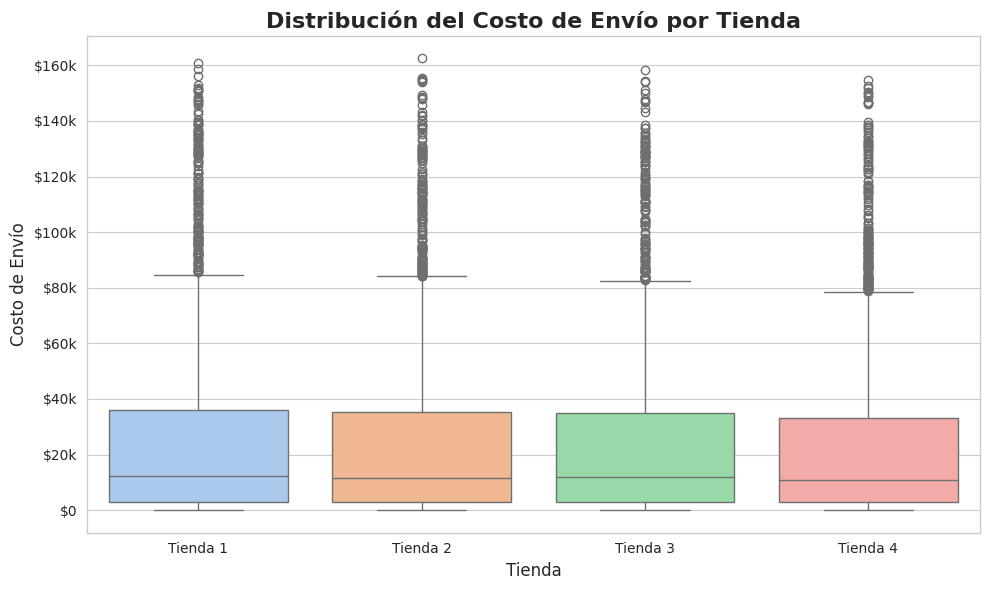

In [142]:
# Unir todos los DataFrames en uno solo, añadiendo la columna 'Tienda'
df_consolidado = pd.concat([
    df.assign(Tienda=name)
    for name, df in dataframes.items()
], ignore_index=True)


# --- GENERACIÓN DEL GRÁFICO BOX PLOT ---

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Usar Seaborn para crear el boxplot
sns.boxplot(
    x='Tienda',
    y='Costo de envío',
    data=df_consolidado,
    hue='Tienda',
    legend=False,
    palette='pastel'
)

# Configuración de Títulos y Ejes
plt.title('Distribución del Costo de Envío por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo de Envío', fontsize=12)

# Formatear el eje Y
def currency_formatter(x, pos):
    if x >= 1000:
        return f'${int(x/1000):,}k'
    return f'${int(x):,}'

formatter = FuncFormatter(currency_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()